## Complex Valued NN

In [ ]:
#install libraries

import pandas as pd
import numpy as np
import sklearn
import tensorflow
import matplotlib.pyplot as plt

In [ ]:
import os
import tensorflow as tf
import tensorflow.keras as keras
from keras import Model
from keras.applications import DenseNet121
from keras.applications import vgg16
from keras.preprocessing import image
from keras.applications.densenet import preprocess_input, decode_predictions
from keras.layers import GlobalMaxPooling2D
from keras.utils import plot_model
import matplotlib.image as mpimg
import cv2
import pathlib
from sklearn.metrics.pairwise import linear_kernel

In [ ]:
from tensorflow.keras.datasets import fashion_mnist

Link: https://complex-valued-neural-networks.readthedocs.io/en/latest/code_examples/fashion_mnist.html

dataset origin: https://www.kaggle.com/datasets/zalando-research/fashionmnist?resource=download

In [ ]:
# load the dataset
(trainX, trainY), (testX, testY) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
data = fashion_mnist.load_data()

In [ ]:
#fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0

#all the pixels range from 0 to 255

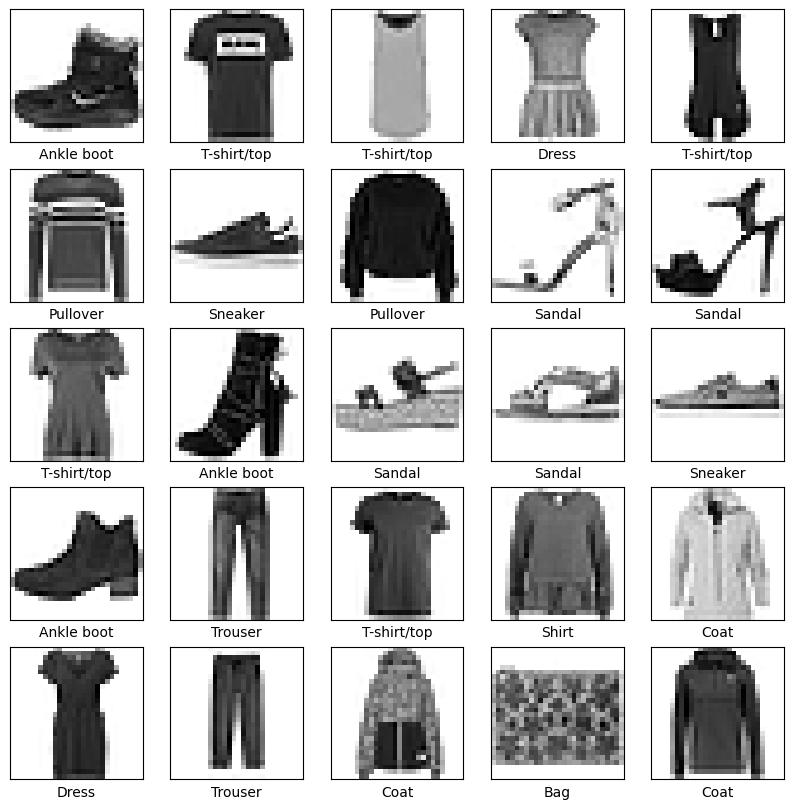

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [ ]:
from tensorflow.keras import layers
import tensorflow as tf
#from keras_complex import ComplexFlatten, ComplexDense

model = tf.keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu', dtype=np.float32),
    layers.Dense(10, dtype=np.float32)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy
               (from_logits=True),
              metrics=['accuracy'])

###Train the model:

In [ ]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5008 - accuracy: 0.8245
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3745 - accuracy: 0.8650
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3371 - accuracy: 0.8767
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3166 - accuracy: 0.8839
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2976 - accuracy: 0.8911
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2835 - accuracy: 0.8954
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2728 - accuracy: 0.9003
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2610 - accuracy: 0.9048
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2499 - accuracy: 0.9067
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.241

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3342 - accuracy: 0.8786 - 841ms/epoch - 3ms/step

Test accuracy: 0.878600001335144


###Make predictions:

In [ ]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [ ]:
predictions[0]

array([9.6020443e-08, 5.0270149e-11, 1.7598081e-11, 9.5936921e-09,
       2.1554118e-09, 5.4535933e-04, 4.8579370e-08, 3.2501894e-03,
       2.7283130e-07, 9.9620402e-01], dtype=float32)

In [ ]:
np.argmax(predictions[0])

9

In [ ]:
test_labels[0]

9

In [ ]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

In [ ]:
def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

###Verify predictions:

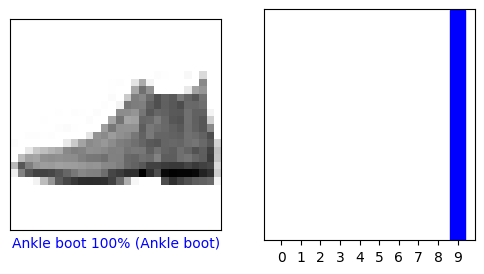

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

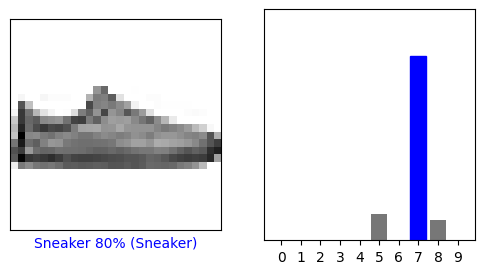

In [ ]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

In [ ]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

### Use the trained model:

In [ ]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [ ]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [ ]:
predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 21ms/step
[[1.4203471e-03 1.9974646e-13 9.9716043e-01 6.8998807e-10 1.1664608e-03
  2.0526112e-11 2.5271342e-04 8.0669219e-20 3.1191805e-10 8.6948427e-14]]


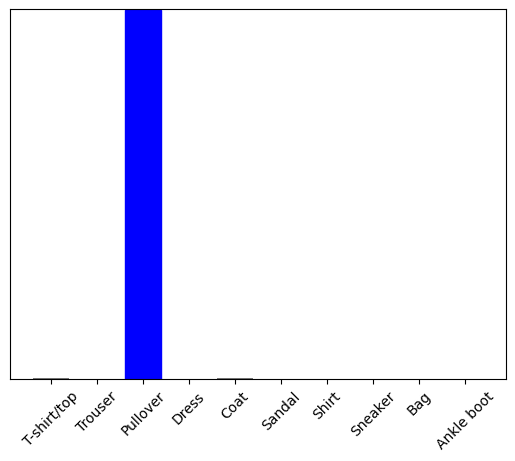

In [ ]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [ ]:
np.argmax(predictions_single[0])

2

#### Make recommendatiins

In [ ]:
import random

# Define outfit categories and assign clothing categories
outfit_categories = {
    'casual': ['T-shirt/top', 'Trouser', 'Sandal'],
    'formal': ['Pullover', 'Trouser', 'Sneaker'],
    'sporty': ['T-shirt/top', 'Trouser', 'Sneaker'],
    # Add more outfit categories as needed
}

def generate_outfit(category):
    items = []
    for clothing in outfit_categories[category]:
        # Here you can use your clothing recognition program to randomly select an item from the dataset
        items.append(random.choice(['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']))
    return items

# Generate a casual outfit
print(generate_outfit('casual'))

['Dress', 'Dress', 'Bag']


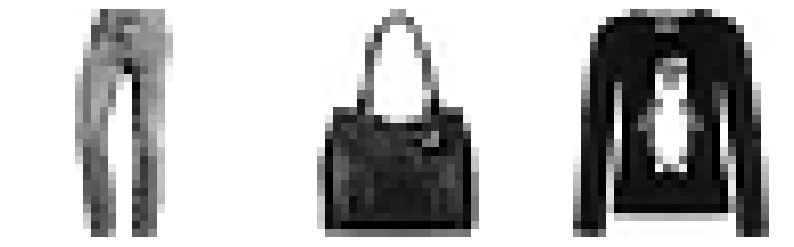

In [ ]:
import random
import matplotlib.pyplot as plt

# Define outfit categories and assign clothing categories
outfit_categories = {
    'casual': ['T-shirt/top', 'Trouser', 'Sandal'],
    'formal': ['Pullover', 'Trouser', 'Sneaker'],
    'sporty': ['T-shirt/top', 'Trouser', 'Sneaker'],
    # Add more outfit categories as needed
}

def generate_outfit(category):
    items = []
    for clothing in outfit_categories[category]:
        # Here you can use your clothing recognition program to randomly select an item from the dataset
        item_index = random.randint(0, len(train_images))
        items.append(train_images[item_index])
    return items

# Generate a casual outfit
items = generate_outfit('casual')

# Display the outfit images
fig, axs = plt.subplots(1, len(items), figsize=(10, 3))
for i, item in enumerate(items):
    axs[i].imshow(item, cmap=plt.cm.binary)
    axs[i].axis('off')
plt.show()

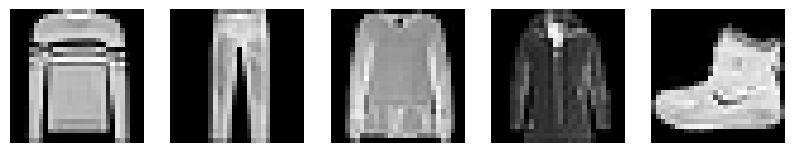

In [ ]:
import random
import matplotlib.pyplot as plt

# Define outfit categories and assign clothing categories
outfit_categories = {
    'top_part': ['T-shirt/top', 'Shirt', 'Pullover'],
    'down': ['Trouser'],
    'singles': ['Dress'],
    'accessories': ['Coat', 'Bag'],
    'shoes': ['Sneaker', 'Ankle boot', 'Sandal']
}

def generate_outfit(category):
    items = []
    if 'singles' not in category:
        items.append(random.choice(outfit_categories['top_part']))
        items.append(random.choice(outfit_categories['down']))
    items.append(random.choice(outfit_categories[category]))
    if 'singles' not in category and random.random() < 0.5:
        items.append(random.choice(outfit_categories['accessories']))
    items.append(random.choice(outfit_categories['shoes']))

    # Check for dress exception
    if 'Dress' in items:
        items = [random.choice(outfit_categories['singles'])]

    return items

# Generate an outfit
items = generate_outfit('top_part')

# Display the outfit images
fig, axs = plt.subplots(1, len(items), figsize=(10, 3))
for i, item in enumerate(items):
    item_index = train_images[train_labels == class_names.index(item)][0]
    axs[i].imshow(item_index.reshape(28, 28, 1), cmap='gray')
    axs[i].axis('off')
plt.show()